# This script contains the following:

1. Importing Visualization Libraries and Data

2. Data Cleaning

3. Exploring Relationships 

# Importing libraries

In [459]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Importing data

In [461]:
# Define path
path = r'/Users/nhungphamthi/Documents/data analytis/Achievement 6'

In [463]:
# Load the data into a DataFrame
df = pd.read_csv(os.path.join(path, 'cleaned_gunviolence.csv'), index_col = False)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       239677 non-null  int64  
 1   incident_id      239677 non-null  int64  
 2   date             239677 non-null  object 
 3   state            239677 non-null  object 
 4   n_killed         239677 non-null  int64  
 5   n_injured        239677 non-null  int64  
 6   n_guns_involved  239677 non-null  float64
 7   n_victims        239677 non-null  int64  
 8   n_suspects       239677 non-null  int64  
 9   n_unharmed       239677 non-null  int64  
 10  n_arrested       239677 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 20.1+ MB


In [175]:
df.head(10)

,Unnamed: 0,incident_id,date,state,n_killed,n_injured,n_guns_involved,n_victims,n_suspects,n_unharmed,n_arrested
0,0,461105,2013-01-01,Pennsylvania,0,4,0.0,4,1,0,1
1,1,460726,2013-01-01,California,1,3,0.0,4,1,0,0
2,2,478855,2013-01-01,Ohio,1,3,2.0,3,2,2,2
3,3,478925,2013-01-05,Colorado,4,0,0.0,3,1,0,0
4,4,478959,2013-01-07,North Carolina,2,2,2.0,3,1,0,0
5,5,478948,2013-01-07,Oklahoma,4,0,0.0,4,2,2,2
6,6,479363,2013-01-19,New Mexico,5,0,2.0,5,1,1,1
7,7,479374,2013-01-21,Louisiana,0,5,0.0,5,1,0,0
8,8,479389,2013-01-21,California,0,4,0.0,4,1,1,0
9,9,492151,2013-01-23,Maryland,1,6,0.0,7,0,0,0


# Exploring Relationships

In [64]:
# Correlations, Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = df.select_dtypes(include=['int', 'float'])

# drop "Unnamed: 0" and "incident_id" columns.
numerical_columns = numerical_columns.drop(columns=['Unnamed: 0', 'incident_id'])

#Now, we create the correlation matrix with the appropriate data
numerical_columns.corr()

,n_killed,n_injured,n_guns_involved,n_victims,n_suspects,n_unharmed,n_arrested
n_killed,1.000000,-0.125425,-0.021718,0.373827,-0.015834,-0.109734,-0.016346
n_injured,-0.125425,1.000000,-0.041273,0.691518,-0.102809,-0.146906,-0.118530
n_guns_involved,-0.021718,-0.041273,1.000000,-0.064286,0.060395,0.030307,0.099853
n_victims,0.373827,0.691518,-0.064286,1.000000,-0.052203,0.075177,-0.122271
n_suspects,-0.015834,-0.102809,0.060395,-0.052203,1.000000,0.837328,0.652778
n_unharmed,-0.109734,-0.146906,0.030307,0.075177,0.837328,1.000000,0.516072
n_arrested,-0.016346,-0.118530,0.099853,-0.122271,0.652778,0.516072,1.000000


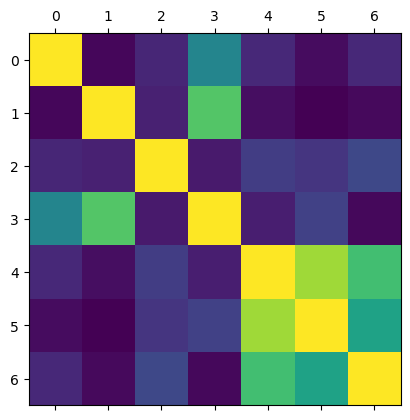

In [66]:
#Now, we use the above data to create a correlation heatmap using matplotlib

plt.matshow(numerical_columns.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

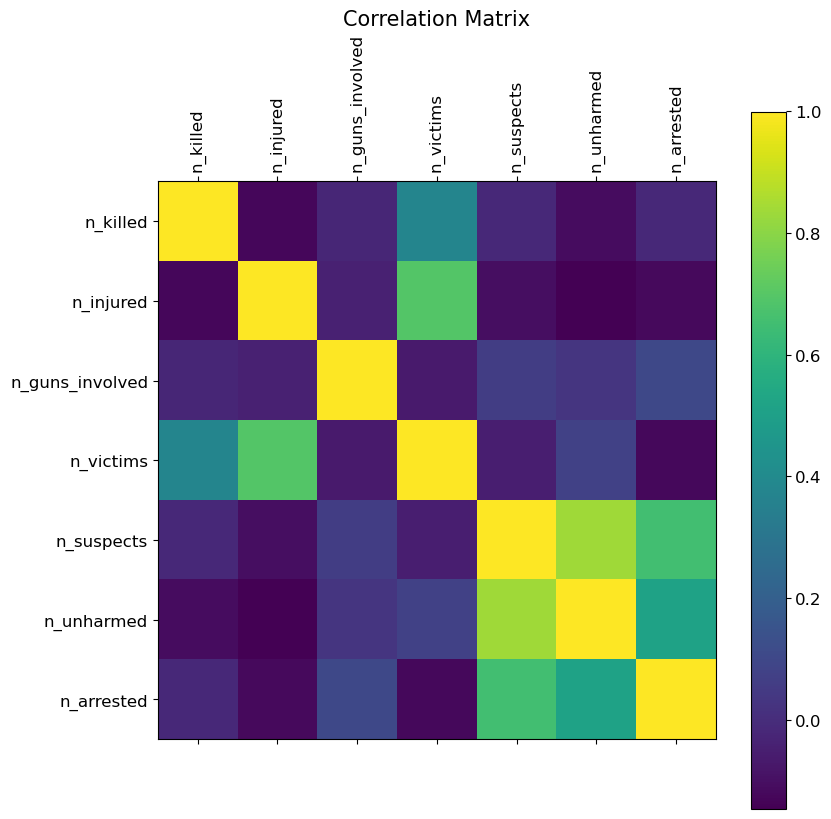

In [68]:
# Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(numerical_columns.corr(), fignum=f.number) #Defines the type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles

### As shown in the legend, the darker the color of a square, the stronger the negative relationship between those two variables. Conversely, the lighter the color in the square, the stronger the positive relationship between the two variables.

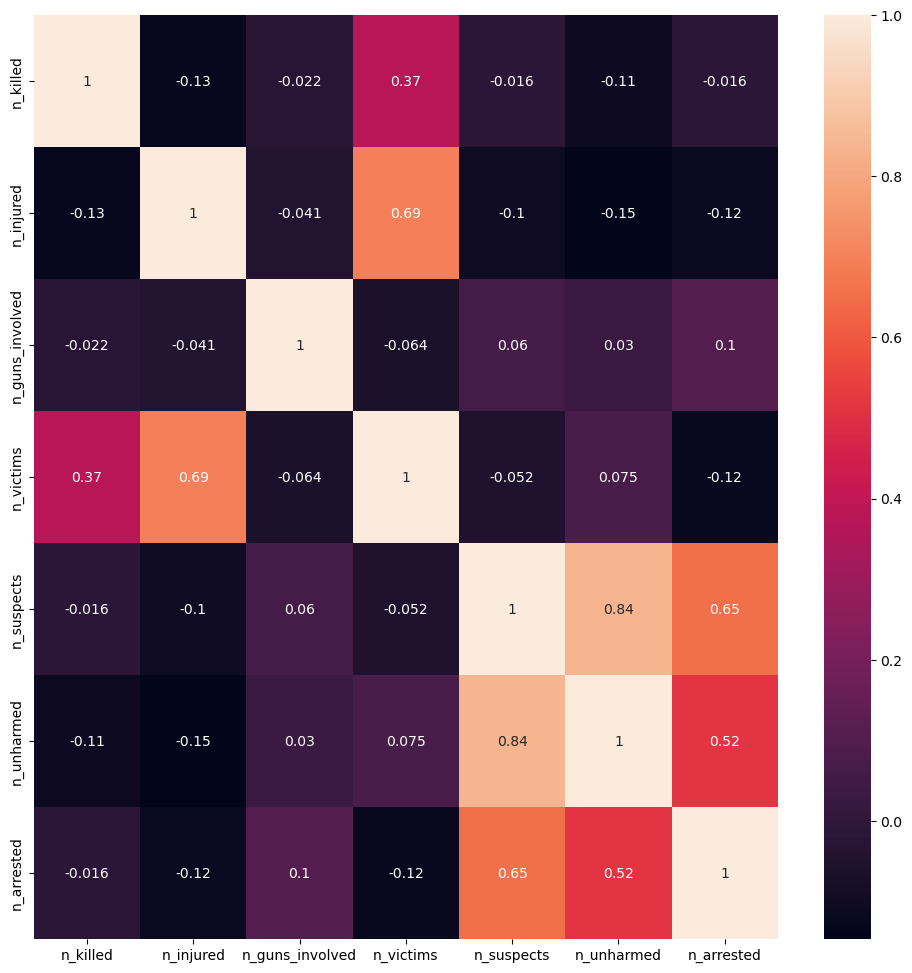

In [70]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### There are somes closed relationships that have brighten color such as between n_arrested and n_suspects, n_victims and and n_injured and some losen relationships that have dark color such as between n_suspects and n_injured. I assumed that the more suspects and guns involved in gun violence, the more killed and injured victims are. But the data disproved my assumption.

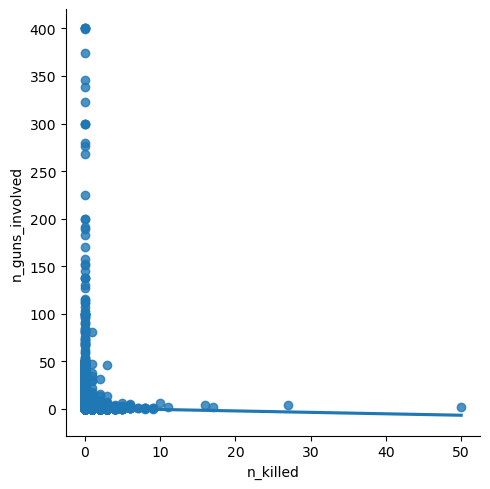

In [76]:
#Create a scatterplot for the "n_killed" and "n_guns_involved" columns in seaborn

sns.lmplot(x = 'n_killed', y = 'n_guns_involved', data = numerical_columns)

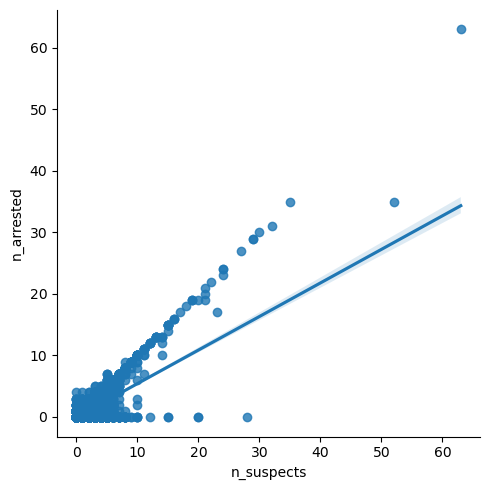

In [79]:
#Create a scatterplot for the "n_suspects" and "n_arrested" columns in seaborn

sns.lmplot(x = 'n_suspects', y = 'n_arrested', data = numerical_columns)

In [83]:
#Creating a segmented df with the variables being used in the pair plot
sub_df=numerical_columns[['n_killed', 'n_injured', 'n_guns_involved', 'n_victims', 'n_suspects', 'n_unharmed', 'n_arrested']]

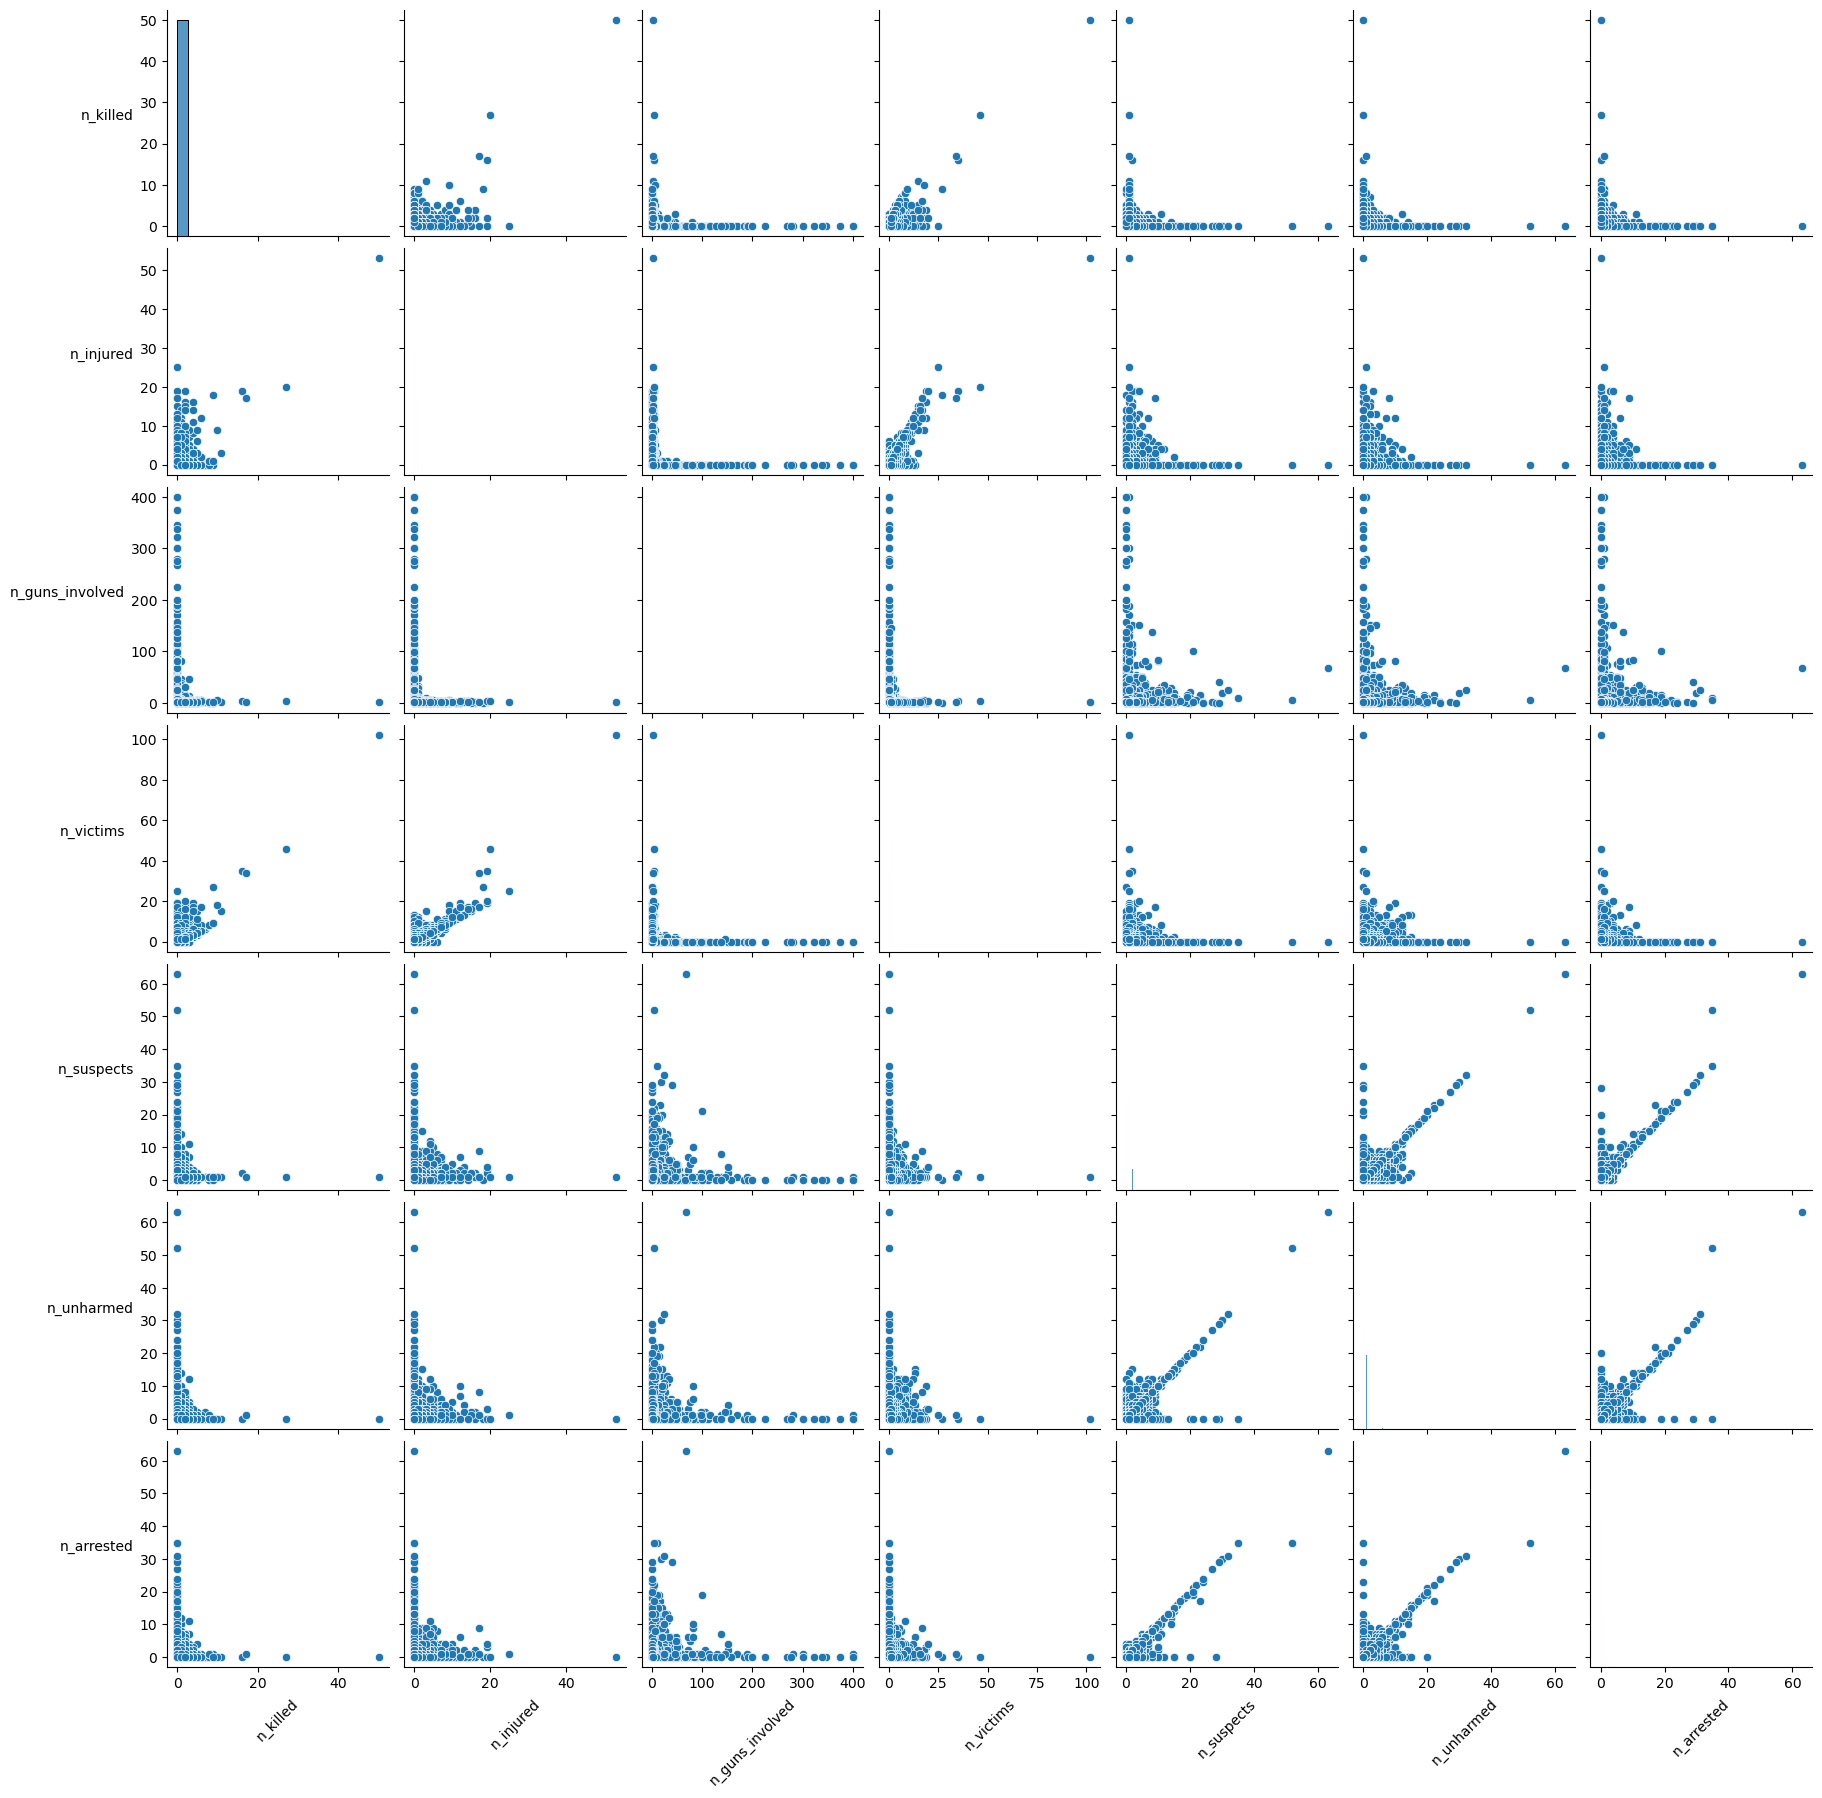

In [85]:
labels=['n_killed', 'n_injured', 'n_guns_involved', 'n_victims', 'n_suspects', 'n_unharmed', 'n_arrested']
x=sns.pairplot(sub_df)
for ax in x.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

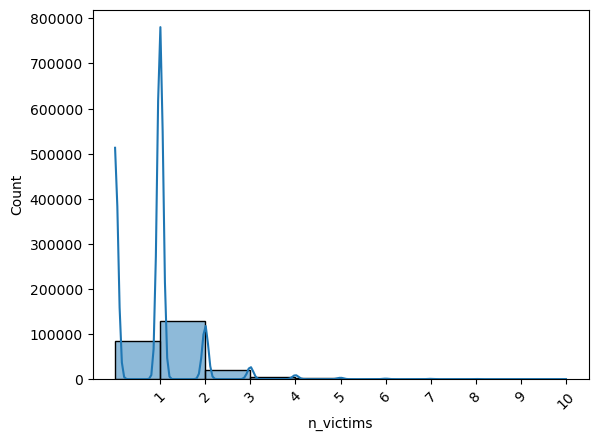

In [21]:
#Filter the DF to include rows where net worth is less than or equal to  (98% of all observations)

filtered_df = df[df['n_victims']<=10]

sns.histplot(data=filtered_df, x='n_victims', bins=10, kde=True)
plt.xticks([1, 2, 3, 4, 5, 6,7,8,9,10], rotation=45)  # Set custom tick positions and rotate x-axis labels
plt.show()  
# Show the plot

In [59]:
#Creating a Violent_level based on histogram plot
df.loc[(df['n_killed'] + df['n_injured'] < 1), 'Violent_level']='Not serious'

In [61]:
df.loc[(df['n_killed'] + df['n_injured']>=2) & (df['n_killed'] + df['n_injured'] <=3), 'Violent_level']='normal'

In [63]:
df.loc[(df['n_killed'] + df['n_injured']>3) & (df['n_killed'] + df['n_injured'] <=5), 'Violent_level']= 'serious'

In [65]:
df.loc[(df['n_killed'] + df['n_injured']>5), 'Violent_level']= 'extrem serious'

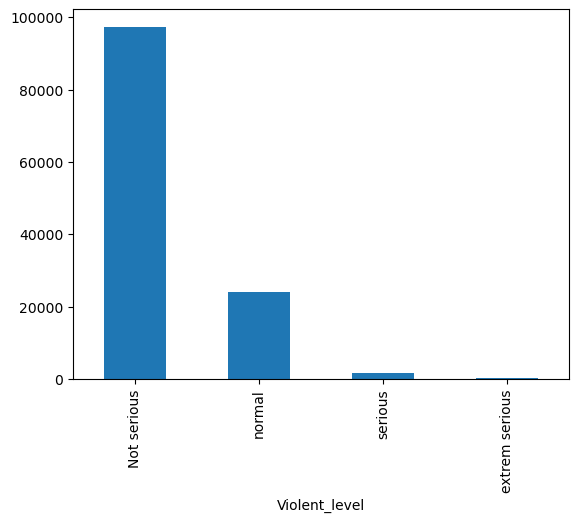

In [69]:
#Creating a violent level bar. The bar shows that almost violent case is not serious. 
bar = df['Violent_level'].value_counts().plot.bar()

In [71]:
#understanding spread of data in 'victims'
df ['n_victims'].describe().round()

count    239677.0
mean          1.0
std           1.0
min           0.0
25%           0.0
50%           1.0
75%           1.0
max         102.0
Name: n_victims, dtype: float64

In [241]:
df['Month']= df['date'].str[5:7]

In [243]:
# I want to check number of killed, injured, victims by year and month. So I add more columns of year and month based on columns date.
df ['Year']= df['date'].str[0:4]

In [245]:
df.head ()

,Unnamed: 0,incident_id,date,state,n_killed,n_injured,n_guns_involved,n_victims,n_suspects,n_unharmed,n_arrested,Month,Year
0,0,461105,2013-01-01,Pennsylvania,0,4,0.0,4,1,0,1,01,2013
1,1,460726,2013-01-01,California,1,3,0.0,4,1,0,0,01,2013
2,2,478855,2013-01-01,Ohio,1,3,2.0,3,2,2,2,01,2013
3,3,478925,2013-01-05,Colorado,4,0,0.0,3,1,0,0,01,2013
4,4,478959,2013-01-07,North Carolina,2,2,2.0,3,1,0,0,01,2013


In [247]:
print(set(df['Month']))

{'03', '05', '06', '07', '12', '04', '02', '09', '11', '01', '08', '10'}


In [249]:
print(set(df['Year']))

{'2015', '2017', '2018', '2016', '2014', '2013'}


In [403]:
victims_sum = df.groupby('Month').sum()['n_victims']
killed_sum = df.groupby('Month').sum()['n_killed']
arrested_sum = df.groupby('Month').sum()['n_arrested']

<function matplotlib.pyplot.show(close=None, block=None)>

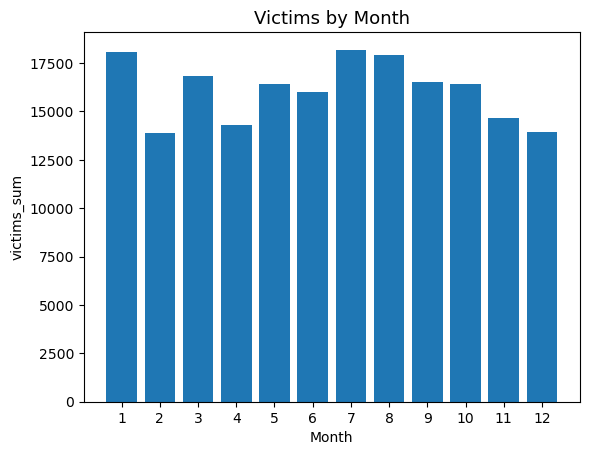

In [355]:
months = range(1,13)
plt.bar(x=months, height=victims_sum)
plt.xticks (months)
plt.xlabel('Month')
matplotlib.pyplot.ylabel('victims_sum')
plt.title('Victims by Month', size = 13)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

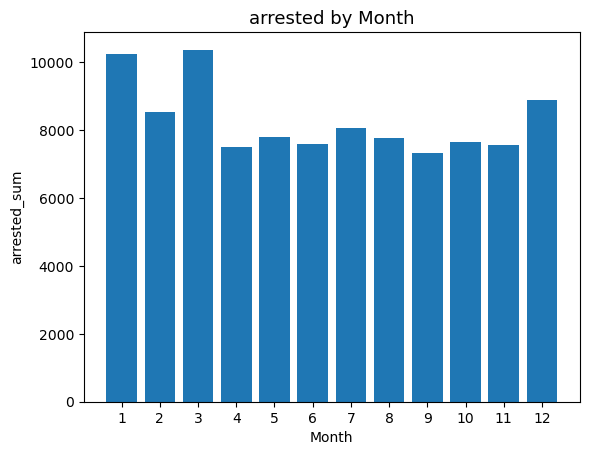

In [407]:
months = range(1,13)
plt.bar(x=months, height=arrested_sum)
plt.xticks (months)
plt.xlabel('Month')
matplotlib.pyplot.ylabel('arrested_sum')
plt.title('arrested by Month', size = 13)
plt.show

In [427]:
victims_sum = df.groupby('state').sum()['n_victims']
killed_sum = df.groupby('state').sum()['n_killed']
suspects_sum = df.groupby('state').sum()['n_suspects']
arrested_sum = df.groupby('state').sum()['n_arrested']

In [417]:
states = df['state'].unique ()

<function matplotlib.pyplot.show(close=None, block=None)>

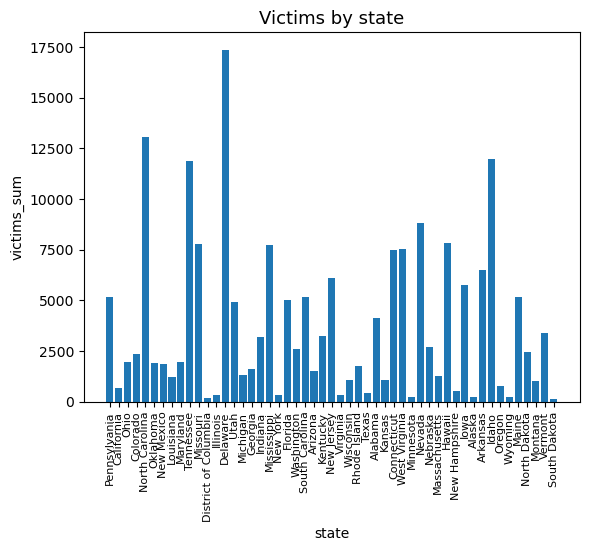

In [423]:
plt.bar(x= states, height=victims_sum)
plt.xticks (states, rotation=90, size =8)
plt.xlabel('state')
matplotlib.pyplot.ylabel('victims_sum')
plt.title('Victims by state', size= 13)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

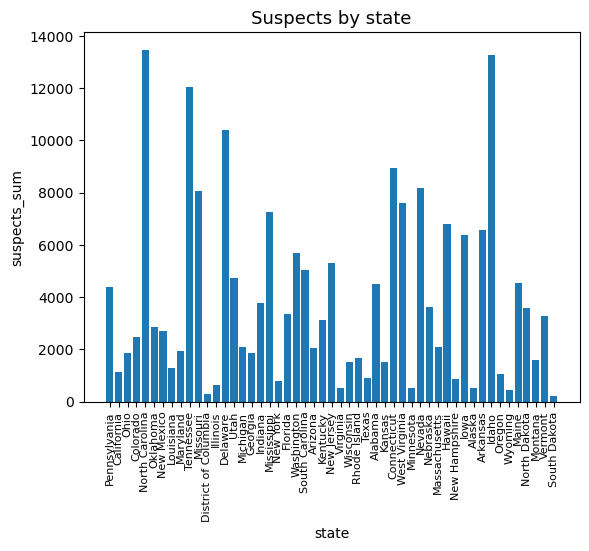

In [439]:
plt.bar(x= states, height= suspects_sum)
plt.xticks (states, rotation=90, size =8)
plt.xlabel('state')
matplotlib.pyplot.ylabel('suspects_sum')
plt.title('Suspects by state', size= 13)
plt.show

In [453]:
# Create line chart but unsuccesfly. 
states = df['state'].unique ()
plt.plot(states, arrested_sum)
plt.xticks (states, rotation=90, size =8)
plt.xlabel('state')
matplotlib.pyplot.ylabel('arrested_sum')
plt.title('Arrested by state', size= 13)
plt.show

TypeError: 'tuple' object is not callable

In [473]:
#Creating a type of violence based on number of suspects 
df.loc[(df['n_suspects'] <= 1), 'Type_Violence']='individual violence'
df.loc[(df['n_suspects'] > 1), 'Type_Violence']='group violence'

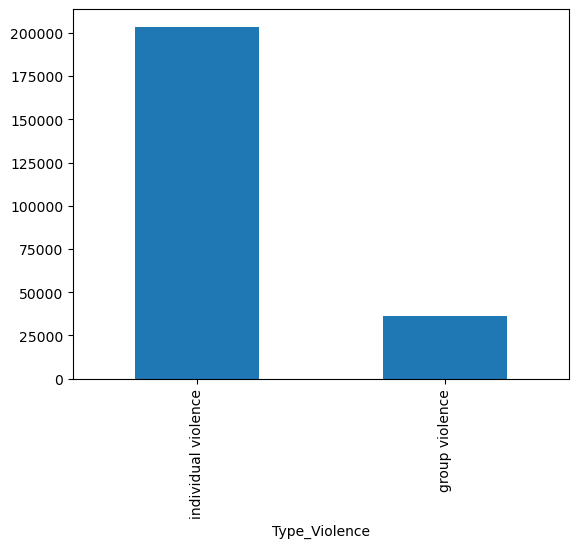

In [475]:
#Creating a violent level bar. The bar shows that almost violent case is not serious. 
bar = df['Type_Violence'].value_counts().plot.bar()

### The data tell me the following:

1. There is no significant variation in the number of gun violence victims by month. This refutes the hypothesis that gun violence is seasonal.

2. The number of gun violence victims is highest in Delaware, but the number of suspects is highest in Idaho and North Carolina. I have not yet found the reason why.

3. There is no data on the gender and age of both victims and suspects, so there is no answer to the question of the characteristics of gun violence related to gender and age.

4. I divided gun violence into individual and group violence based on the number of suspects. The results show that most of the violence is individual violence.

5. I divided the violence level based on the number of injuries and deaths. The results show that most of the violence is not sirous (when the total number of injuries and deaths is less than or equal to 1). However, there is also a small number of very serious incidents of violence where the total number of deaths and injuries is greater than 5.